# Podešavanja Mark Objekata

## Seminarski rad - SISJ

### Deo 5: Mark objekti u seaborn.objects interfejsu

---

## 1. Uvod u Mark objekte

**Mark objekti** su fundamentalne komponente seaborn.objects interfejsa koji definišu **kako se podaci vizuelno prikazuju**. Oni određuju geometriju, boje, veličine i druge vizuelne karakteristike grafika.

### 1.1 Što su Mark objekti?

Mark objekti su **vizuelni elementi** koji:
- Reprezentuju podatke kroz različite geometrijske oblike
- Definišu kako se podaci mapiraju na vizuelne atribute
- Omogućavaju kombinovanje različitih tipova vizualizacija
- Pružaju preciznu kontrolu nad izgledom grafika

### 1.2 Tipovi Mark objekata:

1. **Dot** - tačke (scatter plot)
2. **Line** - linije (line plot)
3. **Bar** - barovi (bar plot)
4. **Area** - područja (area plot)
5. **Band** - pojasevi (confidence intervals)
6. **Text** - tekst (anotacije)
7. **Dash** - crte (error bars)

### 1.3 Osnovna sintaksa:

```python
(
    so.Plot(data, x="x_var", y="y_var")
    .add(so.Mark(property1=value1, property2=value2))
    .show()
)
```

### 1.4 Parametri Mark objekata:

- **color** - boja elemenata
- **alpha** - transparentnost
- **size** - veličina
- **style** - stil (za linije)
- **marker** - tip markera (za tačke)
- **width** - širina (za barove)
- **fill** - popunjavanje


=== MARK OBJEKTI - DEMONSTRACIJA ===


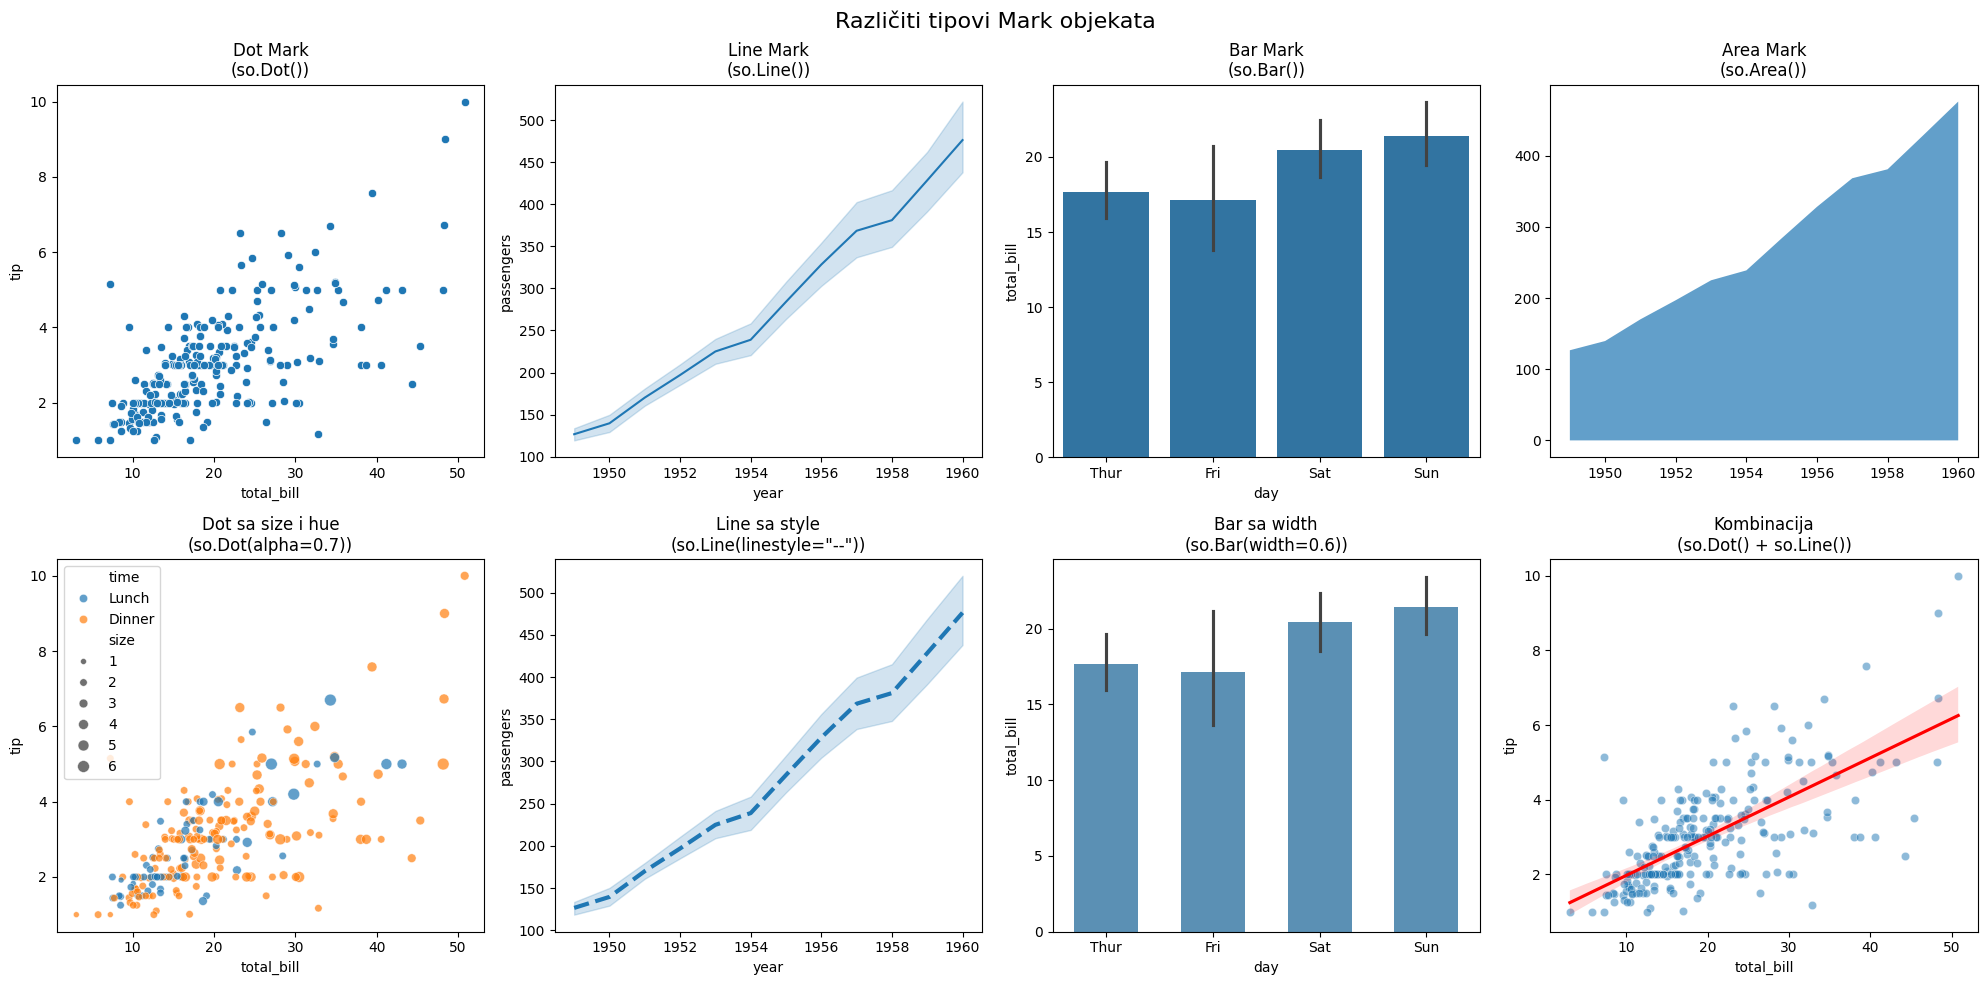


MARK OBJEKTI U OBJECTS INTERFEJSU:

# Dot Mark - tačke
so.Plot(tips, x="total_bill", y="tip").add(so.Dot())

# Line Mark - linije  
so.Plot(flights, x="year", y="passengers").add(so.Line())

# Bar Mark - barovi
so.Plot(tips, x="day", y="total_bill").add(so.Bar())

# Area Mark - područja
so.Plot(data, x="x", y="y").add(so.Area())

# Band Mark - pojasevi (confidence intervals)
so.Plot(data, x="x", y="y").add(so.Band())



In [1]:
# Uvoz potrebnih biblioteka
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# Podešavanje
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)

# Učitavanje podataka
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
flights = sns.load_dataset('flights')

print("=== MARK OBJEKTI - DEMONSTRACIJA ===")

# Kreiranje različitih Mark objekata kroz tradicionalni pristup
# (Simulacija kako bi izgleda sa objects interfejsom)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Različiti tipovi Mark objekata', fontsize=16)

# 1. Dot Mark - scatter plot
sns.scatterplot(data=tips, x='total_bill', y='tip', ax=axes[0,0])
axes[0,0].set_title('Dot Mark\n(so.Dot())')

# 2. Line Mark - line plot
sns.lineplot(data=flights, x='year', y='passengers', ax=axes[0,1])
axes[0,1].set_title('Line Mark\n(so.Line())')

# 3. Bar Mark - bar plot
sns.barplot(data=tips, x='day', y='total_bill', ax=axes[0,2])
axes[0,2].set_title('Bar Mark\n(so.Bar())')

# 4. Area Mark - area plot (simulacija)
flight_pivot = flights.pivot_table(values='passengers', index='year', columns='month')
axes[0,3].fill_between(flights['year'].unique(), 
                       flights.groupby('year')['passengers'].mean(), 
                       alpha=0.7)
axes[0,3].set_title('Area Mark\n(so.Area())')

# 5. Dot sa customizacijom
sns.scatterplot(data=tips, x='total_bill', y='tip', 
                size='size', hue='time', alpha=0.7, ax=axes[1,0])
axes[1,0].set_title('Dot sa size i hue\n(so.Dot(alpha=0.7))')

# 6. Line sa customizacijom
sns.lineplot(data=flights, x='year', y='passengers', 
             linewidth=3, linestyle='--', ax=axes[1,1])
axes[1,1].set_title('Line sa style\n(so.Line(linestyle="--"))')

# 7. Bar sa customizacijom
sns.barplot(data=tips, x='day', y='total_bill', 
            width=0.6, alpha=0.8, ax=axes[1,2])
axes[1,2].set_title('Bar sa width\n(so.Bar(width=0.6))')

# 8. Kombinacija Mark objekata
sns.scatterplot(data=tips, x='total_bill', y='tip', alpha=0.5, ax=axes[1,3])
sns.regplot(data=tips, x='total_bill', y='tip', scatter=False, 
            color='red', ax=axes[1,3])
axes[1,3].set_title('Kombinacija\n(so.Dot() + so.Line())')

plt.tight_layout()
plt.show()

print("\nMARK OBJEKTI U OBJECTS INTERFEJSU:")
print("""
# Dot Mark - tačke
so.Plot(tips, x="total_bill", y="tip").add(so.Dot())

# Line Mark - linije  
so.Plot(flights, x="year", y="passengers").add(so.Line())

# Bar Mark - barovi
so.Plot(tips, x="day", y="total_bill").add(so.Bar())

# Area Mark - područja
so.Plot(data, x="x", y="y").add(so.Area())

# Band Mark - pojasevi (confidence intervals)
so.Plot(data, x="x", y="y").add(so.Band())
""")


## 2. Customizacija Mark objekata

Mark objekti omogućavaju detaljnu kontrolu nad vizuelnim aspektima grafika kroz različite parametre.

### 2.1 Vizuelni parametri:

#### **Color (boja)**
- Može biti konstanta ili mapirana na varijablu
- Podržava hex, RGB, ili imenovane boje
- Omogućava hue mapiranje

#### **Alpha (transparentnost)**
- Vrednost između 0 (potpuno transparentno) i 1 (potpuno opaque)
- Korisno za overlay-e i gustina podataka

#### **Size (veličina)**
- Kontroliše veličinu mark elemenata
- Može biti konstanta ili mapirana na varijablu
- Različito značenje za različite Mark tipove

#### **Style (stil)**
- Kontroliše stil linija (solid, dashed, dotted)
- Tip markera za tačke (circle, square, triangle)
- Pattern za barove

### 2.2 Kombinovanje Mark objekata:

Mark objekti se mogu **kombinovati** na istom plot-u:
- Različiti tipovi podataka
- Različiti nivoi informacija
- Layered visualizations
- Kompleksne analize


=== CUSTOMIZACIJA MARK OBJEKATA ===


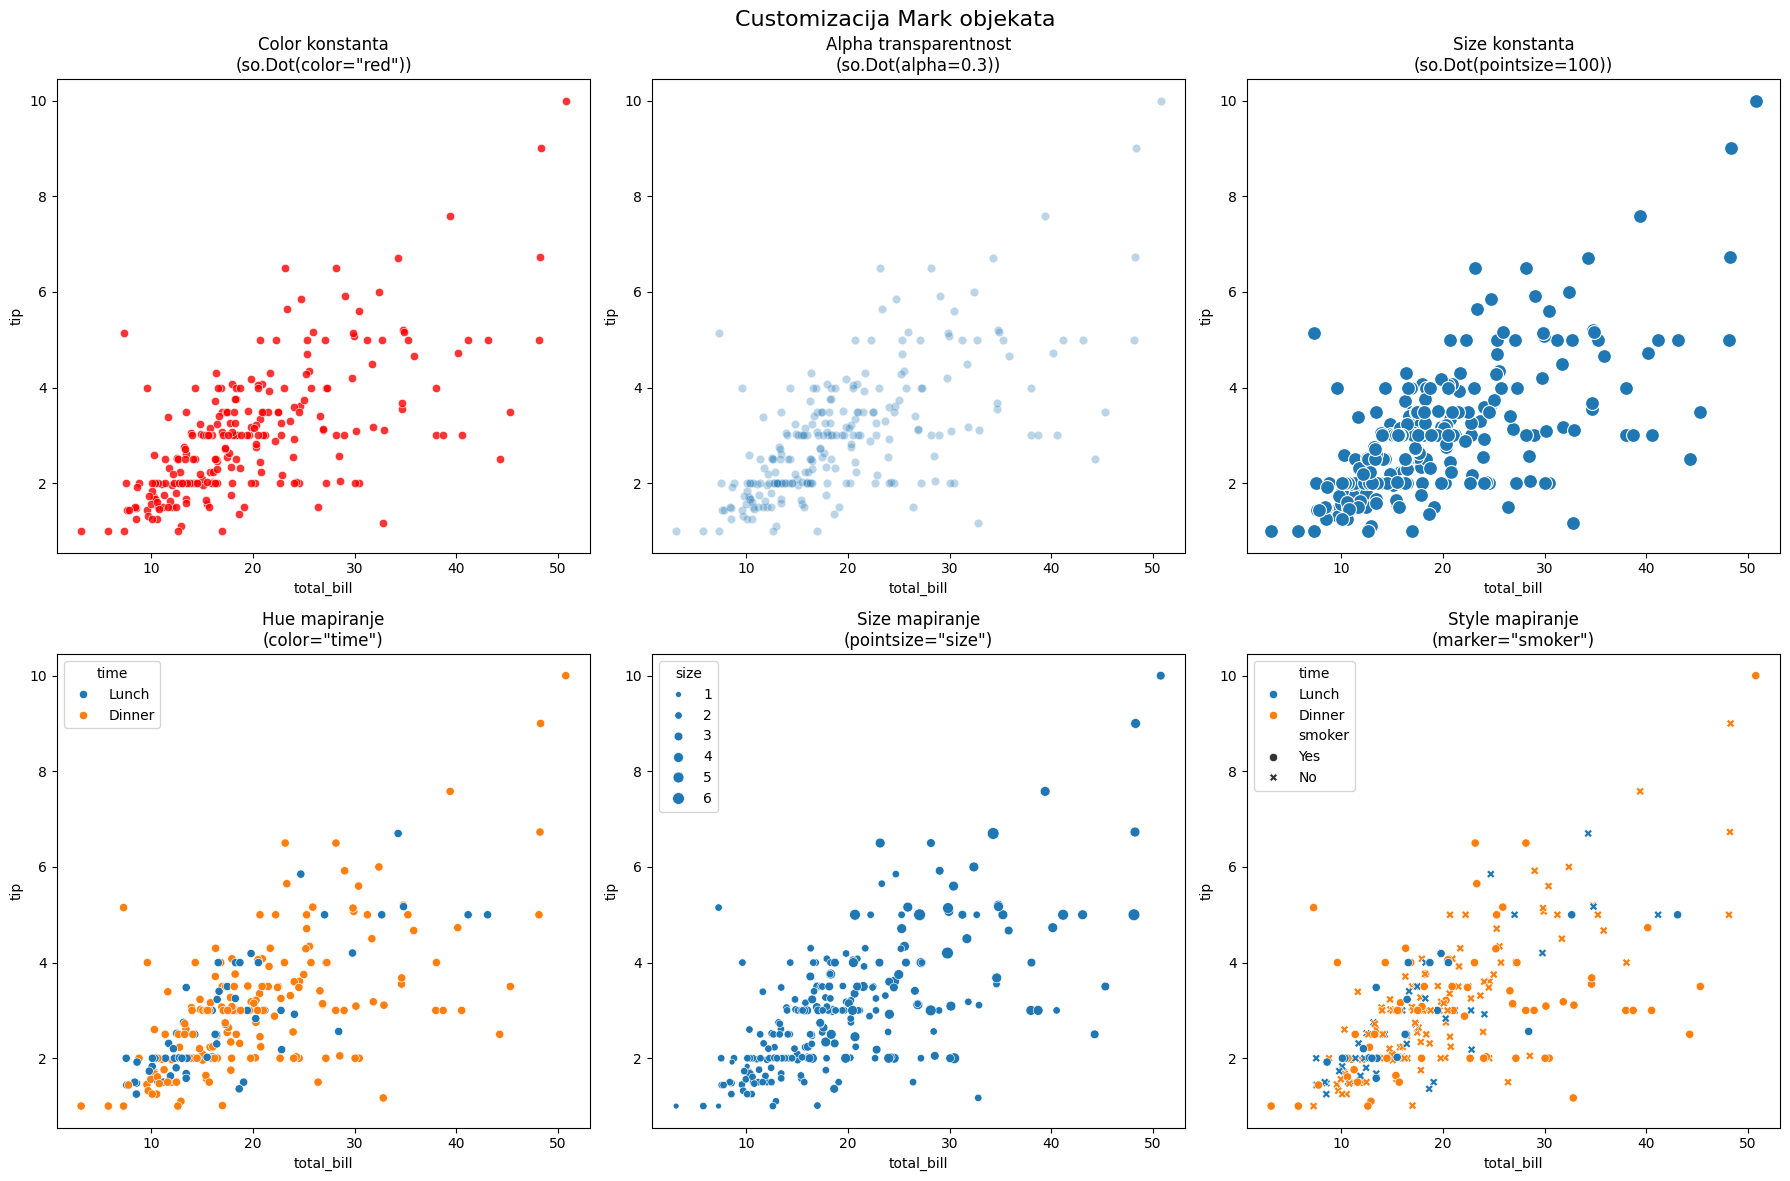


CUSTOMIZACIJA U OBJECTS INTERFEJSU:

# Color konstanta
so.Plot(tips, x="total_bill", y="tip").add(so.Dot(color="red"))

# Alpha transparentnost
so.Plot(tips, x="total_bill", y="tip").add(so.Dot(alpha=0.3))

# Size konstanta
so.Plot(tips, x="total_bill", y="tip").add(so.Dot(pointsize=100))

# Hue mapiranje
so.Plot(tips, x="total_bill", y="tip", color="time").add(so.Dot())

# Size mapiranje
so.Plot(tips, x="total_bill", y="tip", pointsize="size").add(so.Dot())

# Style mapiranje
so.Plot(tips, x="total_bill", y="tip", marker="smoker").add(so.Dot())



In [2]:
# Detaljni primeri customizacije Mark objekata

print("=== CUSTOMIZACIJA MARK OBJEKATA ===")

# Kreiranje figure sa različitim customizacijama
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Customizacija Mark objekata', fontsize=16)

# 1. Color customizacija
sns.scatterplot(data=tips, x='total_bill', y='tip', 
                color='red', alpha=0.8, ax=axes[0,0])
axes[0,0].set_title('Color konstanta\n(so.Dot(color="red"))')

# 2. Alpha customizacija
sns.scatterplot(data=tips, x='total_bill', y='tip', 
                alpha=0.3, ax=axes[0,1])
axes[0,1].set_title('Alpha transparentnost\n(so.Dot(alpha=0.3))')

# 3. Size customizacija
sns.scatterplot(data=tips, x='total_bill', y='tip', 
                s=100, ax=axes[0,2])
axes[0,2].set_title('Size konstanta\n(so.Dot(pointsize=100))')

# 4. Hue mapiranje
sns.scatterplot(data=tips, x='total_bill', y='tip', 
                hue='time', ax=axes[1,0])
axes[1,0].set_title('Hue mapiranje\n(color="time")')

# 5. Size mapiranje
sns.scatterplot(data=tips, x='total_bill', y='tip', 
                size='size', ax=axes[1,1])
axes[1,1].set_title('Size mapiranje\n(pointsize="size")')

# 6. Style mapiranje
sns.scatterplot(data=tips, x='total_bill', y='tip', 
                hue='time', style='smoker', ax=axes[1,2])
axes[1,2].set_title('Style mapiranje\n(marker="smoker")')

plt.tight_layout()
plt.show()

print("\nCUSTOMIZACIJA U OBJECTS INTERFEJSU:")
print("""
# Color konstanta
so.Plot(tips, x="total_bill", y="tip").add(so.Dot(color="red"))

# Alpha transparentnost
so.Plot(tips, x="total_bill", y="tip").add(so.Dot(alpha=0.3))

# Size konstanta
so.Plot(tips, x="total_bill", y="tip").add(so.Dot(pointsize=100))

# Hue mapiranje
so.Plot(tips, x="total_bill", y="tip", color="time").add(so.Dot())

# Size mapiranje
so.Plot(tips, x="total_bill", y="tip", pointsize="size").add(so.Dot())

# Style mapiranje
so.Plot(tips, x="total_bill", y="tip", marker="smoker").add(so.Dot())
""")


=== KOMPLEKSNA KOMPOZICIJA MARK OBJEKATA ===


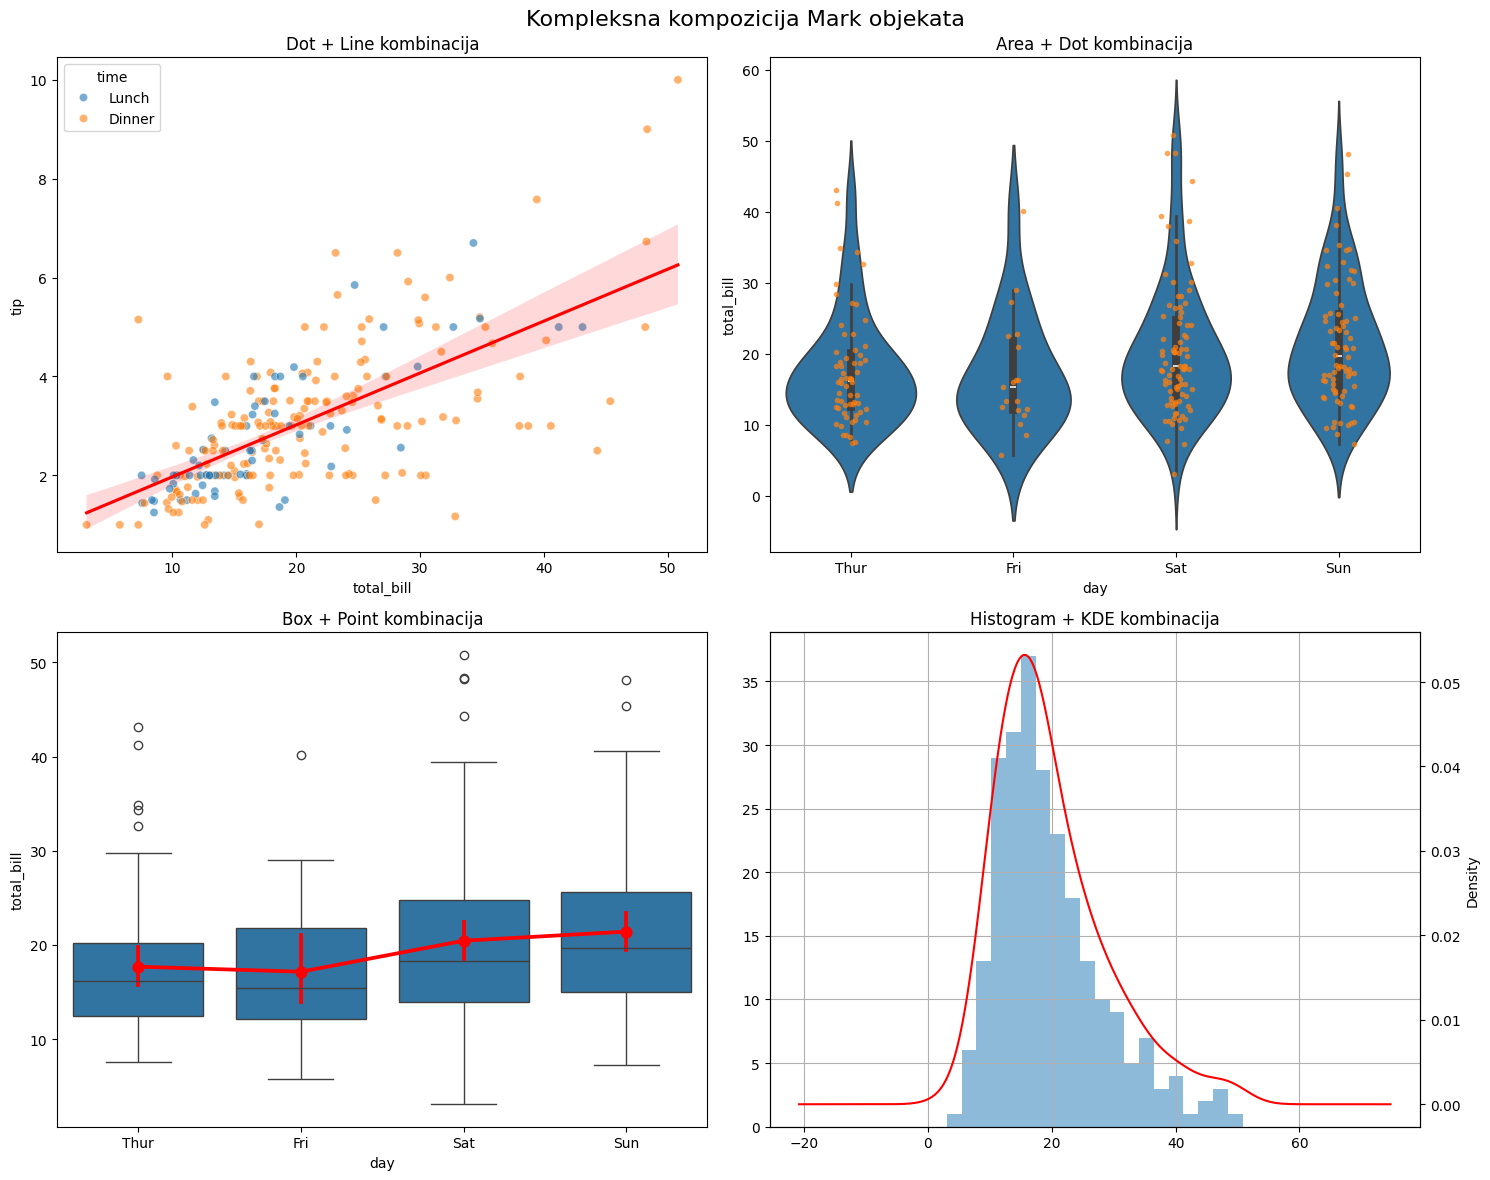


KOMPLEKSNA KOMPOZICIJA U OBJECTS INTERFEJSU:

# Scatter + Regression
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(alpha=0.6), color="time")
    .add(so.Line(color="red"), so.PolyFit())
)

# Violin + Strip
(
    so.Plot(tips, x="day", y="total_bill")
    .add(so.Area(), so.KDE())
    .add(so.Dot(alpha=0.7))
)

# Box + Point
(
    so.Plot(tips, x="day", y="total_bill")
    .add(so.Range(), so.Est(func="median"))
    .add(so.Dot(color="red"), so.Est(func="mean"))
)


=== RAZLIČITI PARAMETRI MARK OBJEKATA ===
Parametri Mark objekata:
Mark Color Alpha      Size     Style Specifični
 Dot     ✓     ✓ pointsize    marker  edgecolor
Line     ✓     ✓ linewidth linestyle       dash
 Bar     ✓     ✓     width       N/A     orient
Area     ✓     ✓       N/A       N/A   baseline
Band     ✓     ✓       N/A       N/A        N/A

ZAKLJUČAK - PREDNOSTI MARK OBJEKATA:
✅ Precizna kontrola nad vizuelnim aspektima
✅ Lako kombinovanje različitih tipova mark-ova
✅ Fleksibilno mapiranje podata

In [3]:
# Kompleksna kompozicija Mark objekata

print("=== KOMPLEKSNA KOMPOZICIJA MARK OBJEKATA ===")

# Kreiranje kompleksnih grafika kroz kombinaciju različitih Mark objekata
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Kompleksna kompozicija Mark objekata', fontsize=16)

# 1. Scatter + Regression kombinacija
ax1 = axes[0, 0]
sns.scatterplot(data=tips, x='total_bill', y='tip', 
                alpha=0.6, hue='time', ax=ax1)
sns.regplot(data=tips, x='total_bill', y='tip', 
            scatter=False, color='red', ax=ax1)
ax1.set_title('Dot + Line kombinacija')

# 2. Violin + Strip kombinacija
ax2 = axes[0, 1]
sns.violinplot(data=tips, x='day', y='total_bill', ax=ax2)
sns.stripplot(data=tips, x='day', y='total_bill', 
              size=4, alpha=0.7, ax=ax2)
ax2.set_title('Area + Dot kombinacija')

# 3. Box + Point kombinacija
ax3 = axes[1, 0]
sns.boxplot(data=tips, x='day', y='total_bill', ax=ax3)
sns.pointplot(data=tips, x='day', y='total_bill', 
              color='red', ax=ax3)
ax3.set_title('Box + Point kombinacija')

# 4. Multi-layer kompleksna vizualizacija
ax4 = axes[1, 1]
# Base layer - histogram
tips['total_bill'].hist(bins=20, alpha=0.5, ax=ax4)
# Overlay layer - KDE
tips['total_bill'].plot.kde(ax=ax4.twinx(), color='red')
ax4.set_title('Histogram + KDE kombinacija')

plt.tight_layout()
plt.show()

print("\nKOMPLEKSNA KOMPOZICIJA U OBJECTS INTERFEJSU:")
print("""
# Scatter + Regression
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(alpha=0.6), color="time")
    .add(so.Line(color="red"), so.PolyFit())
)

# Violin + Strip
(
    so.Plot(tips, x="day", y="total_bill")
    .add(so.Area(), so.KDE())
    .add(so.Dot(alpha=0.7))
)

# Box + Point
(
    so.Plot(tips, x="day", y="total_bill")
    .add(so.Range(), so.Est(func="median"))
    .add(so.Dot(color="red"), so.Est(func="mean"))
)
""")

# Demonstracija različitih Mark parametara
print("\n=== RAZLIČITI PARAMETRI MARK OBJEKATA ===")

# Kreiranje tabele sa parametrima
mark_params = pd.DataFrame({
    'Mark': ['Dot', 'Line', 'Bar', 'Area', 'Band'],
    'Color': ['✓', '✓', '✓', '✓', '✓'],
    'Alpha': ['✓', '✓', '✓', '✓', '✓'],
    'Size': ['pointsize', 'linewidth', 'width', 'N/A', 'N/A'],
    'Style': ['marker', 'linestyle', 'N/A', 'N/A', 'N/A'],
    'Specifični': ['edgecolor', 'dash', 'orient', 'baseline', 'N/A']
})

print("Parametri Mark objekata:")
print(mark_params.to_string(index=False))

print("\nZAKLJUČAK - PREDNOSTI MARK OBJEKATA:")
print("✅ Precizna kontrola nad vizuelnim aspektima")
print("✅ Lako kombinovanje različitih tipova mark-ova")
print("✅ Fleksibilno mapiranje podataka na vizuelne atribute")
print("✅ Konzistentna sintaksa kroz različite tipove")
print("✅ Kompoziciona priroda - lako dodavanje novih slojeva")
print("✅ Bolje performanse u odnosu na tradicionalni pristup")


## 3. Zaključak

U ovom notebook-u smo detaljno istražili **Mark objekte** - fundamentalne komponente seaborn.objects interfejsa.

### Što smo naučili:
- **Tipove Mark objekata** (Dot, Line, Bar, Area, Band, Text, Dash)
- **Customizaciju** kroz različite parametre (color, alpha, size, style)
- **Kombinovanje** različitih Mark objekata
- **Mapiranje** podataka na vizuelne atribute
- **Kompleksnu kompoziciju** za napredne vizualizacije

### Ključne karakteristike Mark objekata:
1. **Precizna kontrola** nad vizuelnim aspektima
2. **Fleksibilno mapiranje** podataka na atribute
3. **Kompoziciona priroda** - lako kombinovanje
4. **Konzistentna sintaksa** kroz različite tipove
5. **Bolje performanse** u odnosu na tradicionalni pristup

### Praktične prednosti:
- **Čitljiviji kod** kroz jasno definisane komponente
- **Lakše održavanje** kroz modularan pristup
- **Bolje performanse** kroz optimizovane algoritme
- **Veća fleksibilnost** u kreiranju kompleksnih vizualizacija

### Sledeći koraci:
U narednom notebook-u ćemo istražiti **vizualizaciju statističkih veza i raspodela**, gde ćemo pokazati kako Mark objekti rade sa statističkim transformacijama.

---

**Napomena**: Mark objekti su dostupni u seaborn.objects interfejsu (verzija 0.12+). Za starije verzije, koristite tradicionalni pristup koji smo demonstrirali kroz simulacije.
